![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_stock_market.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Demo  Stock Market Sentiment Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:


<br>


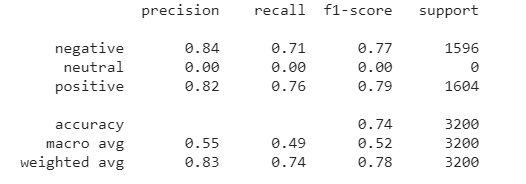




You can achieve these results or even better on this dataset with test  data:


<br>

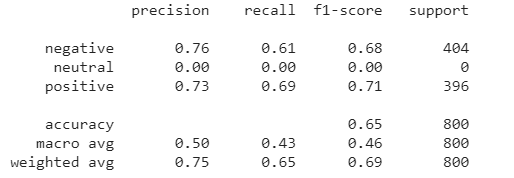


# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 11:33:09--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 11:33:09 (53.5 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 70kB/s 
     |████████████████████████████████| 153kB 48.1MB/s 
     |████████████████████████████████| 204kB 22.4MB/s 
     |████████████████████████████████| 204kB 49.2MB/s 


# 2. Download Stock Market  Sentiment dataset 
https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
#Context

Gathered Stock news from Multiple twitter Handles regarding Economic news dividing into two parts : Negative and positive.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/stock_data.csv


--2021-05-05 11:35:13--  http://ckl-it.de/wp-content/uploads/2021/02/stock_data.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 758217 (740K) [text/csv]
Saving to: ‘stock_data.csv’

stock_data.csv      100%[===================>] 740.45K   819KB/s    in 0.9s    

2021-05-05 11:35:15 (819 KB/s) - ‘stock_data.csv’ saved [758217/758217]



In [ ]:
import pandas as pd
train_path = '/content/stock_data.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
3761,P see what happened from October to Dec that s...,negative
1428,AAP Closed my short for positiveK Will short a...,negative
3091,AAP It may be wise to hold off on buying #AAP ...,negative
620,RT @DaveCBenoit: The banking system is not bui...,negative
1611,"Sensex Slumps Over positive,000 Points From Da...",negative
...,...,...
1281,The rodeo clown sent BK screaming into the S...,negative
1895,WMT breaking out of channel + All MAs are lini...,positive
3458,keep an eye on IDA presentation bout postive d...,positive
3399,DNDN Good place to lock in (some) profit at 7...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        22
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.11      0.19        28

    accuracy                           0.06        50
   macro avg       0.33      0.04      0.06        50
weighted avg       0.56      0.06      0.11        50



,y,sentence_embedding_use,trained_sentiment_confidence,origin_index,trained_sentiment,document,text,sentence
0,negative,"[-0.03631044551730156, -0.02809535153210163, -...",0.532420,3761,neutral,P see what happened from October to Dec that s...,P see what happened from October to Dec that s...,[P see what happened from October to Dec that ...
1,negative,"[-0.019356619566679, 0.02282714657485485, 0.00...",0.528691,1428,neutral,AAP Closed my short for positiveK Will short a...,AAP Closed my short for positiveK Will short a...,[AAP Closed my short for positiveK Will short ...
2,negative,"[0.03622237220406532, -0.06491724401712418, 0....",0.518308,3091,neutral,AAP It may be wise to hold off on buying #AAP ...,AAP It may be wise to hold off on buying #AAP ...,[AAP It may be wise to hold off on buying #AAP...
3,negative,"[0.038874898105859756, 0.025729672983288765, -...",0.538483,620,neutral,RT @DaveCBenoit: The banking system is not bui...,RT @DaveCBenoit: The banking system is not bui...,"[RT @DaveCBenoit:, The banking system is not ..."
4,negative,"[0.04230193793773651, -0.02588844671845436, -0...",0.526358,1611,neutral,"Sensex Slumps Over positive,000 Points From Da...","Sensex Slumps Over positive,000 Points From Da...","[Sensex Slumps Over positive,000 Points From D..."
5,negative,"[-0.000432533270213753, -0.009179827757179737,...",0.530686,876,neutral,Selling your home to a computer was supposed t...,Selling your home to a computer was supposed t...,[Selling your home to a computer was supposed ...
6,positive,"[0.06600425392389297, -0.022004421800374985, -...",0.581016,1678,neutral,"ed Daily Triangle on HEO,..... pdating ong and...","ed Daily Triangle on HEO,..... pdating ong an...","[ed Daily Triangle on HEO,., .... pdating ong ..."
7,positive,"[-0.017160149291157722, -0.03617899864912033, ...",0.549800,482,neutral,P breaking out after expanding from Shark Patt...,P breaking out after expanding from Shark Patt...,[P breaking out after expanding from Shark Pat...
8,positive,"[0.026538891717791557, -0.06604061275720596, -...",0.568579,2540,neutral,Acting well above 26.positive9 flat base trigg...,Acting well above 26.positive9 flat base trigg...,[Acting well above 26.positive9 flat base trig...
9,positive,"[0.08514805138111115, -0.024943925440311432, -...",0.524013,2183,neutral,CYBX broke out to all time highs accompained b...,CYBX broke out to all time highs accompained b...,[CYBX broke out to all time highs accompained ...


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("Bitcoin dropped by 50 percent!")

,sentence_embedding_use,trained_sentiment_confidence,origin_index,trained_sentiment,document,sentence
0,"[0.06509937345981598, -0.05708129703998566, -0...",0.502021,0,neutral,Bitcoin dropped by 50 percent!,[Bitcoin dropped by 50 percent!]


## 5.  Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       1.00      0.73      0.84        22
     neutral       0.00      0.00      0.00         0
    positive       0.90      1.00      0.95        28

    accuracy                           0.88        50
   macro avg       0.63      0.58      0.60        50
weighted avg       0.95      0.88      0.90        50



,y,sentence_embedding_use,trained_sentiment_confidence,origin_index,trained_sentiment,document,text,sentence
0,negative,"[-0.03631044551730156, -0.02809535153210163, -...",0.673180,3761,negative,P see what happened from October to Dec that s...,P see what happened from October to Dec that s...,[P see what happened from October to Dec that ...
1,negative,"[-0.019356619566679, 0.02282714657485485, 0.00...",0.692276,1428,negative,AAP Closed my short for positiveK Will short a...,AAP Closed my short for positiveK Will short a...,[AAP Closed my short for positiveK Will short ...
2,negative,"[0.03622237220406532, -0.06491724401712418, 0....",0.704943,3091,negative,AAP It may be wise to hold off on buying #AAP ...,AAP It may be wise to hold off on buying #AAP ...,[AAP It may be wise to hold off on buying #AAP...
3,negative,"[0.038874898105859756, 0.025729672983288765, -...",0.737828,620,negative,RT @DaveCBenoit: The banking system is not bui...,RT @DaveCBenoit: The banking system is not bui...,"[RT @DaveCBenoit:, The banking system is not ..."
4,negative,"[0.04230193793773651, -0.02588844671845436, -0...",0.690660,1611,negative,"Sensex Slumps Over positive,000 Points From Da...","Sensex Slumps Over positive,000 Points From Da...","[Sensex Slumps Over positive,000 Points From D..."
5,negative,"[-0.000432533270213753, -0.009179827757179737,...",0.674662,876,negative,Selling your home to a computer was supposed t...,Selling your home to a computer was supposed t...,[Selling your home to a computer was supposed ...
6,positive,"[0.06600425392389297, -0.022004421800374985, -...",0.983413,1678,positive,"ed Daily Triangle on HEO,..... pdating ong and...","ed Daily Triangle on HEO,..... pdating ong an...","[ed Daily Triangle on HEO,., .... pdating ong ..."
7,positive,"[-0.017160149291157722, -0.03617899864912033, ...",0.958774,482,positive,P breaking out after expanding from Shark Patt...,P breaking out after expanding from Shark Patt...,[P breaking out after expanding from Shark Pat...
8,positive,"[0.026538891717791557, -0.06604061275720596, -...",0.945701,2540,positive,Acting well above 26.positive9 flat base trigg...,Acting well above 26.positive9 flat base trigg...,[Acting well above 26.positive9 flat base trig...
9,positive,"[0.08514805138111115, -0.024943925440311432, -...",0.897408,2183,positive,CYBX broke out to all time highs accompained b...,CYBX broke out to all time highs accompained b...,[CYBX broke out to all time highs accompained ...


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.81      0.68      0.74      1586
     neutral       0.00      0.00      0.00         0
    positive       0.80      0.73      0.76      1614

    accuracy                           0.71      3200
   macro avg       0.54      0.47      0.50      3200
weighted avg       0.80      0.71      0.75      3200



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

              precision    recall  f1-score   support

    negative       0.76      0.62      0.68       414
     neutral       0.00      0.00      0.00         0
    positive       0.72      0.67      0.69       386

    accuracy                           0.64       800
   macro avg       0.49      0.43      0.46       800
weighted avg       0.74      0.64      0.69       800



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path="./models/classifier_dl_trained")

preds = hdd_pipe.predict('Bitcoin dropped by 50 percent!!')
preds

,sentiment,sentence_embedding_from_disk,sentiment_confidence,document,text,origin_index,sentence
0,"[negative, negative]","[[0.17410096526145935, 0.14491602778434753, 0....","[0.7221757, 0.7221757]",Bitcoin dropped by 50 percent!!,Bitcoin dropped by 50 percent!!,8589934592,"[Bitcoin dropped by 50 percent!, !]"


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno